In [83]:
# Acquire file of bright green eyes from the internet.
!wget -O green_eyes.jpg https://i.ytimg.com/vi/tyrfJbg0Pfc/maxresdefault.jpg

--2021-11-03 05:19:18--  https://i.ytimg.com/vi/tyrfJbg0Pfc/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 173.194.197.119, 64.233.191.119, 173.194.74.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|173.194.197.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68458 (67K) [image/jpeg]
Saving to: ‘green_eyes.jpg’

green_eyes.jpg      100%[===================>]  66.85K  --.-KB/s    in 0.001s  

2021-11-03 05:19:18 (96.2 MB/s) - ‘green_eyes.jpg’ saved [68458/68458]



In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load image with alpha channel
img = cv2.imread("green_eyes.jpg")

# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

# blue is 240 in range 0 to 360; so half in OpenCV
# green is 120 in range 0 to 360; so half in OpenCV
blue_hue = 120
green_hue = 60

# diff hue (blue_hue - green_hue)
diff_hue = blue_hue - green_hue

# create mask for green color in hsv
lower = (20,70,70)
upper = (90,170,180)
mask = cv2.inRange(hsv, lower, upper)
mask = cv2.merge([mask,mask,mask])

# apply morphology to clean mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)

# modify hue channel by adding difference and modulo 180 
hnew = np.mod(h + diff_hue, 180).astype(np.uint8)

# recombine channels and bias value to make brighter
hsv_new = cv2.merge([hnew,s,v+85])

# convert back to bgr
bgr_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

# blend with original using mask
result = np.where(mask==(255, 255, 255), bgr_new, img)

# save output
cv2.imwrite('eyes_green_mask.png', mask)
cv2.imwrite('eyes_green2blue.png', result)

True

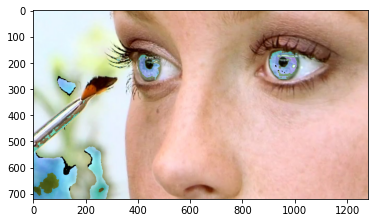

In [85]:
plt.imshow(result[...,::-1])

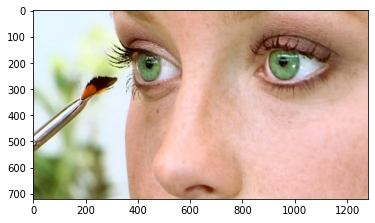

In [86]:
plt.imshow(img[...,::-1])